In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [389]:
m01=pd.read_csv("meter_01_all.csv",parse_dates=['date_time'],delimiter=',')
m01.head()

,date_time,temperature (C)
0,2012-09-24 13:30:00,11.5882
1,2012-09-24 14:00:00,11.5882
2,2012-09-24 14:30:00,12.2216
3,2012-09-24 15:00:00,12.6090
4,2012-09-24 15:30:00,12.6471


In [390]:
m04=pd.read_csv("meter_04_all.csv",parse_dates=['date_time'],delimiter=',')
m04.head()


,date_time,consumption (kWh)
0,2012-09-24 13:30:00,69.0591
1,2012-09-24 14:00:00,68.7600
2,2012-09-24 14:30:00,67.6455
3,2012-09-24 15:00:00,67.2157
4,2012-09-24 15:30:00,63.7158


In [391]:
m01p = m01.set_index('date_time')
m04p = m04.set_index('date_time')
m04p.head()
#m04p.plot(figsize=(12,2))

,consumption (kWh)
date_time,
2012-09-24 13:30:00,69.0591
2012-09-24 14:00:00,68.7600
2012-09-24 14:30:00,67.6455
2012-09-24 15:00:00,67.2157
2012-09-24 15:30:00,63.7158


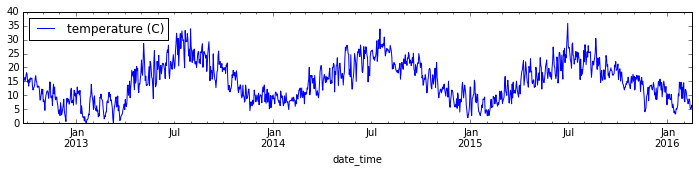

In [392]:
m01p.resample('D',how=max).plot(figsize=(12, 2))

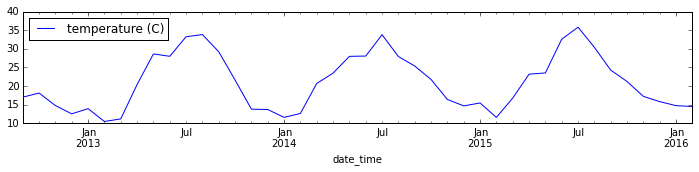

In [393]:
m01p.resample('M',how=max).plot(figsize=(12, 2))

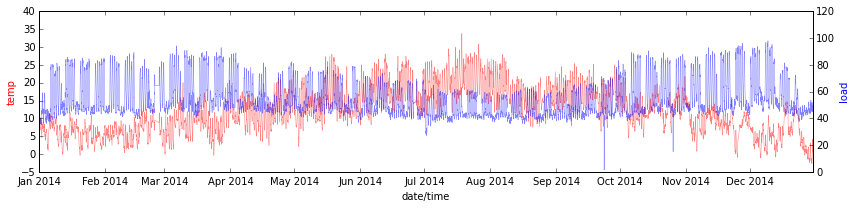

In [394]:
fig,ax1 = plt.subplots(figsize=(12,3))

ax2 = ax1.twinx()
ax1.plot(m01['date_time'],m01['temperature (C)'],c='red',lw=0.5,alpha=0.5)
ax2.plot(m04['date_time'],m04['consumption (kWh)'],c='blue',lw=0.5,alpha=0.5)
ax1.set_ylabel('temp', color='red')
ax2.set_ylabel('load', color='blue')
ax1.set_xlabel('date/time')

plt.xlim("2014-01-01","2014-12-31")
plt.tight_layout()
plt.show()

In [395]:
m01dmax = m01p.resample('D',how='max')
m01dmin = m01p.resample('D',how='min')
m04dsum = m04p.resample('D',how='sum')
m01dmin.head()

,temperature (C)
date_time,
2012-09-24,8.48079
2012-09-25,7.78568
2012-09-26,10.17650
2012-09-27,8.41176
2012-09-28,8.05960


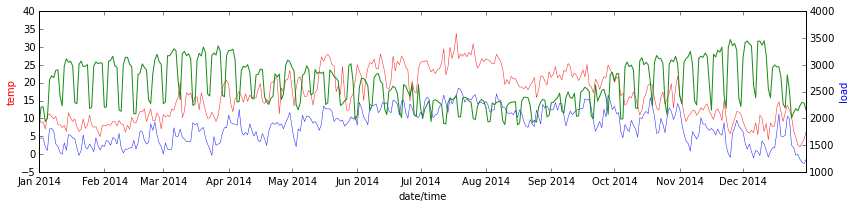

In [399]:
fig,ax1 = plt.subplots(figsize=(12,3))
ax2 = ax1.twinx()
ax1.plot(m01dmax.index, m01dmax,c='red', lw=0.5,alpha=0.9)
ax1.plot(m01dmin.index, m01dmin,c='blue', lw=0.5,alpha=0.9)
ax2.plot(m04dsum.index, m04dsum,c='green',lw=1.0,alpha=0.9)
ax1.set_ylabel('temp', color='red')
ax2.set_ylabel('load', color='blue')
ax1.set_xlabel('date/time')

plt.xlim("2014-01-01","2014-12-31")
plt.tight_layout()
plt.show()